# 1. 载入需要的库

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# display Chinese characters
rcParams['font.family'] = "FZXiHei I-Z08S"
rcParams['font.size'] = '14'

# 2. 数据获取

In [2]:
df = pd.read_csv('./data/train.csv', index_col=['Id'])
df_test = pd.read_csv('./data/test.csv', index_col=['Id'])
y = df.SalePrice
df_train = df.drop(labels=["SalePrice"], axis=1)
df_train['train_set']=True
df_test['train_set']=False
df = pd.concat([df_train, df_test])
del df_train
del df_test

# 3. 数据概览
## 3.1 数据整体情况

In [3]:
print("数据维度情况: ", df.shape)
#  分别列出数字类型和条目类型的特征统计情况
num_of_numerical_cols = df._get_numeric_data().columns.shape[0]
print("数字类型特征数量",num_of_numerical_cols,)
print("条目类型特征数量", df.shape[1] - num_of_numerical_cols)
print("数据摘要")
df.head(10)

数据维度情况:  (2919, 80)
数字类型特征数量 37
条目类型特征数量 43
数据摘要


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,train_set
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,True
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,True
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,True
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,True
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,True
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,True
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,True
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,True
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,True


## 3.2 数据缺失情况分析

In [4]:
def get_missing():
    data_df_na = df.isnull().mean(axis=0)
    data_df_na = data_df_na.drop(data_df_na[data_df_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'missing_rate': data_df_na})
    print('missing_data.shape = ', missing_data.shape)
    return missing_data
missing_data = get_missing()
missing_data

missing_data.shape =  (34, 1)


,missing_rate
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageYrBlt,0.054471
GarageQual,0.054471
GarageCond,0.054471


Text(0.5,1,'特征数据丢失率一览图')

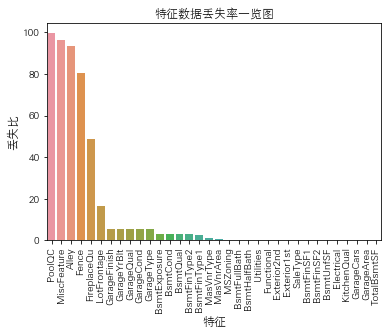

In [5]:
# 丢失可视化展现
sns.barplot(x = missing_data.index, y = 100 *missing_data.missing_rate )
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (18,4)
plt.xlabel('特征', fontsize=12)
plt.ylabel('丢失比', fontsize=12)
plt.title('特征数据丢失率一览图', fontsize=12)

# 数据处理
## 4.1 填补丢失的数据


In [6]:
# 没有游泳池(pool)的，一律填写 None，表示无
df['PoolQC'] = df['PoolQC'].fillna('None')
df['PoolArea'] = df['PoolArea'].fillna(0)

df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# LotForntage 的填充采取 Neighboarhood 的分区平均值进行填充
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.mean()))

# gara 车库丢失数据填充
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[col] = df[col].fillna('None')
for col in ['GarageCars','GarageArea','GarageYrBlt']:
    df[col] = df[col].fillna(0)

# basement 地下室及相关特征数据填充方法
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    
#  masonry veneer 建筑材料特征数据填充方法
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# MSZoning 出售类型 ,按照最常用的填充
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# Utilities 的类型分布情况为
#AllPub    2916 NoSeWa       1
# 因此该特征可以考虑直接丢弃
df.drop(labels=['Utilities'], axis=1, inplace=True)

# Functional 房屋分类，按照通用类型填充
df['Functional'] = df['Functional'].fillna('Typ')

# Exterior1st, Exterior2nd 外层装饰材料,也采取使用最常见的类型填充
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

# SaleType 也按照常见类型填充
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

#Electrical 电力系统
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

#KitchenQual， 字段说明里有Kitchen，但是数据里没有这个字段
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

## 4.2 看是否还有丢失的数据

In [7]:
print(get_missing())

missing_data.shape =  (0, 1)
Empty DataFrame
Columns: [missing_rate]
Index: []


## 4.3 类型转换
对于那些用数值表示，但没有大小比较意义的特征类型，我们把数据类型强制转为字符型，这样模型不会尝试对这些值进行比较

In [8]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

## 4.4 对条目类型特征进行 one-hot 编码

In [9]:
# 进行 one-hot 编码
if False:
    need_onehot_cols =  df.select_dtypes(['object']).columns
    for col in need_onehot_cols:
        dummies =  pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
    df.drop(labels=need_onehot_cols, axis=1, inplace=True)
    df.filter(regex='Alley_*').describe()

## 4.5 增加特征向量
我们增加一个房屋总面积的特征向量

In [10]:
df['totalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['totalSF'].head(10)

Id
1     2566.0
2     2524.0
3     2706.0
4     2473.0
5     3343.0
6     2158.0
7     3380.0
8     3197.0
9     2726.0
10    2068.0
Name: totalSF, dtype: float64

In [11]:
# 检查数值类型特征的倾斜度
import scipy
numerical_cols = df.select_dtypes(['float','int']).columns
skewness_of_cols = {}
for col in numerical_cols:
    skewness_of_cols[col] = scipy.stats.skew(df[col].dropna())
# skewness_of_cols = df[num_of_numerical_cols].apply(
#                     lambda x:scipy.stats.skew(x)).sort_values(
#                     ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_cols})
skewness_df.sort_values(['Skewness'], ascending=0, inplace=True)
skewness_df.head(10)

,Skewness
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [12]:
# 对偏离度较高的特征进行 Box-Cox 调整
skewness_df = skewness_df[abs(skewness_df) > 0.75]
print("skewness shape = ", skewness_df.shape)
cols = skewness_df.index
lamb = 0.15
for col in cols:
    df[col] = scipy.special.boxcox1p(df[col], lamb)

skewness shape =  (33, 1)


In [13]:
# 再次检查偏离度
numerical_cols = df.select_dtypes(['float','int']).columns
skewness_of_cols = {}
for col in numerical_cols:
    skewness_of_cols[col] = scipy.stats.skew(df[col].dropna())
# skewness_of_cols = df[num_of_numerical_cols].apply(
#                     lambda x:scipy.stats.skew(x)).sort_values(
#                     ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_cols})
skewness_df.sort_values(['Skewness'], ascending=0, inplace=True)
skewness_df.head(10)

,Skewness
PoolArea,15.119426
3SsnPorch,8.924822
LowQualFinSF,8.744143
MiscVal,5.597060
BsmtHalfBath,3.788243
KitchenAbvGr,3.698825
ScreenPorch,2.978396
BsmtFinSF2,2.564481
EnclosedPorch,2.025461
MasVnrArea,0.636361


In [14]:
from sklearn.preprocessing import LabelEncoder

cate_features = df.select_dtypes(['object']).columns
# lb = LabelEncoder()
# for col in cate_features:
#     lb.fit(df[col].values.tolist())
#     df[col] = lb.transform(df[col].values.tolist())

for col in cate_features:
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df, dummies], axis=1)
df.drop(labels=cate_features, axis=1, inplace=True)
print(df.shape)
print(df.head())

(2919, 449)
    LotFrontage    LotArea  OverallQual  OverallCond  YearRemodAdd  \
Id                                                                   
1      5.831328  19.212182     2.440268     2.055642     14.187527   
2      6.221214  19.712205     2.259674     2.602594     14.145138   
3      5.914940  20.347241     2.440268     2.055642     14.185966   
4      5.684507  19.691553     2.440268     2.055642     14.135652   
5      6.314735  21.325160     2.602594     2.055642     14.182841   

    MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   ...     \
Id                                                               ...      
1     8.059126   11.170327         0.0   7.483296    11.692623   ...      
2     0.000000   12.062832         0.0   8.897844    12.792276   ...      
3     7.646538   10.200343         0.0   9.917060    11.892039   ...      
4     0.000000    8.274266         0.0  10.468500    11.354094   ...      
5     9.391827   10.971129         0.0  10.2210

## 4.6 对数值型数据做规整化

In [15]:
from sklearn.preprocessing import RobustScaler
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    # turns out that sklearn works very well 
    rs = RobustScaler()
    rs.fit(data)
    data = rs.transform(data)
    #div = np.percentile(data,0.75,axis=0) - np.percentile(data,0.25,axis=0)
    #np.place(div, div < 1., 1.)
    #print(div)
    #data = (data-np.median(data,axis=0))/div
    return data

df_train = df[df['train_set'] == True]
df_test = df[df['train_set' ] == False]
df_train.drop(labels=['train_set'], axis=1, inplace=True)
df_test.drop(labels=['train_set'],axis=1, inplace=True)

X_train = normalize_data(df_train)
df_test = normalize_data(df_test)
y_train = np.log1p(y)

## 4.6 数据拆分

In [16]:
# 拆分数据集
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print("训练数据集:", X_train.shape)
print("校验数据集", X_test.shape)

训练数据集: (1314, 448)
校验数据集 (146, 448)


# 5. 创建模型

我们尝试创建不同的模型，然后将模型进行堆叠

## 5.1 创建可能的线性回归模型

In [17]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_features='sqrt',
                                   max_depth=4, min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)
rfr = RandomForestRegressor(n_estimators=3000,
                           max_depth=4, max_features='sqrt',
                           min_samples_leaf=15, min_samples_split=10, 
                           random_state =0)
lasso = Lasso(alpha = 0.0005, random_state=1)
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
linreg = LinearRegression()
nn = MLPRegressor(hidden_layer_sizes = (90, 90),alpha = 2.75)
adboost = AdaBoostRegressor(n_estimators=3000, learning_rate=0.015, 
                            loss='square', random_state=0)

## 5.2 模型集成

In [18]:
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
import os
def get_rmse(y_pred, y_target):
    return np.sqrt(mean_squared_error(y_pred, y_target))
model_fpath = './data/model.bin'
if os.path.exists(model_fpath):
    model = joblib.load(model_fpath)
else:
    model = StackingRegressor(
        regressors=[rfr, enet, linreg, lasso, gboost, lasso, adboost, nn, gboost, 
                    adboost, gboost, gboost, nn, adboost, gboost, gboost, gboost],
        meta_regressor=linreg,
        verbose = 1
    )
    model.fit(X_train, y_train)
    with open(model_fpath,'wb') as f:
        joblib.dump(model, f)

y_pred = model.predict(X_train)        
# 拟合结果的评估和可视化
print("Mean Squared Error: %.4f" % get_rmse(y_pred, y_train))
print('Variance Score: %.4f' % model.score(X_test, y_test))


Fitting 17 regressors...
Fitting regressor1: randomforestregressor (1/17)
Fitting regressor2: elasticnet (2/17)
Fitting regressor3: linearregression (3/17)
Fitting regressor4: lasso (4/17)
Fitting regressor5: gradientboostingregressor (5/17)
Fitting regressor6: lasso (6/17)
Fitting regressor7: adaboostregressor (7/17)
Fitting regressor11: gradientboostingregressor (11/17)
Fitting regressor12: gradientboostingregressor (12/17)
Fitting regressor13: mlpregressor (13/17)
Fitting regressor14: adaboostregressor (14/17)
Fitting regressor15: gradientboostingregressor (15/17)
Fitting regressor16: gradientboostingregressor (16/17)
Fitting regressor17: gradientboostingregressor (17/17)
Mean Squared Error: 0.0515
Variance Score: 0.8888


In [24]:
#predictions = model.predict(df_test)
df_test
# my_submission = pd.DataFrame({'Id': df_test.index, 'SalePrice':  np.expm1(predictions)})
# my_submission.to_csv('./house_price_pred.csv', index=False)
# my_submission.head()

array([[ 0.46996417,  0.48754267, -0.53046805, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5142009 ,  0.97342072,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19434966,  0.8987403 , -0.53046805, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.07630747,  1.80714826, -0.53046805, ...,  0.        ,
        -1.        ,  0.        ],
       [-0.41840365,  0.23950763, -0.53046805, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19434966,  0.05426903,  0.46953195, ...,  0.        ,
         0.        ,  0.        ]])